In [1]:
import os
# Prevenção de vazamento de memória do MKL no Windows
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
# Carregar os dados
df = pd.read_csv('dados_soja.csv')

In [5]:
df.shape

(27, 4)

In [6]:
df.head(30)

,id,localidade,valor,unidade
0,0,Rondônia,3.727.182,Mil Reais
1,1,Acre,117.790,Mil Reais
2,2,Amazonas,101.583,Mil Reais
3,3,Roraima,839.864,Mil Reais
4,4,Pará,7.307.684,Mil Reais
5,5,Amapá,24.721,Mil Reais
6,6,Tocantins,7.423.563,Mil Reais
7,7,Maranhão,8.338.428,Mil Reais
8,8,Piauí,7.322.801,Mil Reais
9,9,Ceará,25.110,Mil Reais


In [7]:
# Selecionar variáveis relevantes
X = df[['id', 'valor']]



In [8]:
X.head(30)

,id,valor
0,0,3.727.182
1,1,117.790
2,2,101.583
3,3,839.864
4,4,7.307.684
5,5,24.721
6,6,7.423.563
7,7,8.338.428
8,8,7.322.801
9,9,25.110


In [9]:
df['valor'] = df['valor'].replace('-', '0')              # Substitui '-' por '0'
df['valor'] = df['valor'].astype(str).str.replace('.', '', regex=False)  # Remove pontos
df['valor'] = df['valor'].astype(float)                 # Converte para float

In [10]:
X.head(30)

,id,valor
0,0,3.727.182
1,1,117.790
2,2,101.583
3,3,839.864
4,4,7.307.684
5,5,24.721
6,6,7.423.563
7,7,8.338.428
8,8,7.322.801
9,9,25.110


In [11]:
X = df[['valor']].values


In [14]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

In [15]:
print(df[['id', 'valor', 'Cluster']])

    id       valor  Cluster
0    0   3727182.0        2
1    1    117790.0        0
2    2    101583.0        0
3    3    839864.0        0
4    4   7307684.0        2
5    5     24721.0        0
6    6   7423563.0        2
7    7   8338428.0        2
8    8   7322801.0        2
9    9     25110.0        0
10  10       600.0        0
11  11         0.0        0
12  12         0.0        0
13  13     35327.0        0
14  14         0.0        0
15  15  14432772.0        4
16  16  13653404.0        4
17  17      2951.0        0
18  18      4179.0        0
19  19   7161317.0        2
20  20  34549450.0        1
21  21   5325337.0        2
22  22  36103542.0        1
23  23  19232215.0        4
24  24  63847218.0        3
25  25  30079916.0        1
26  26    576554.0        0


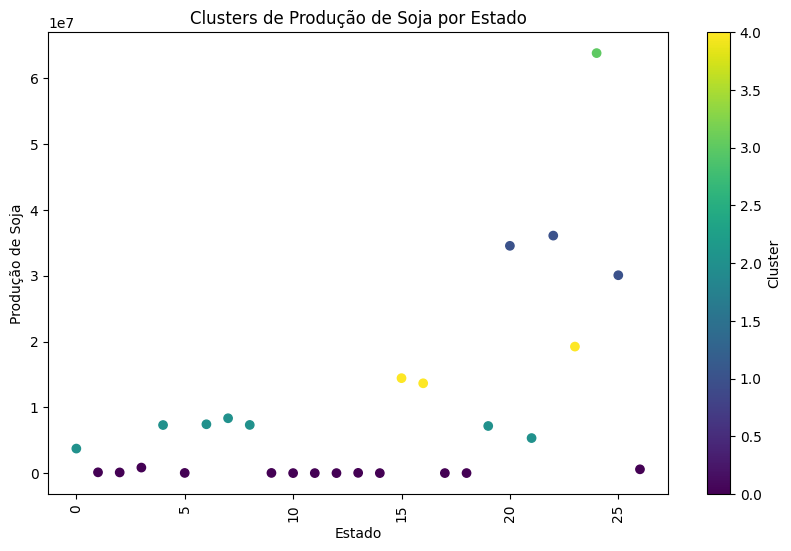

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(df['id'], df['valor'], c=df['Cluster'], cmap='viridis')
plt.xticks(rotation=90)  # rotaciona os nomes dos estados para caber no gráfico
plt.xlabel('Estado')
plt.ylabel('Produção de Soja')
plt.title('Clusters de Produção de Soja por Estado')
plt.colorbar(label='Cluster')
plt.show()